In [589]:
import uproot 
import pylab
import awkward
import numpy as np
import matplotlib.pyplot as plt
!pip install tabulate
from tabulate import tabulate

In [486]:
input_file_emu = uproot.open('all13TeVK0.root')             # elettronici e muonici
input_file_tau=uproot.open('NeutTau_filter.root')           # tau 
input_file_antitau=uproot.open('AntiNeutTau_filter.root')   # anti-tau

# Definizione delle variabili

In [487]:
##############################
### elettronici e muonici ###
#############################

emu = input_file_emu['t']

###################################
##  definizione delle variabili ##
##################################
kin_emu = emu['Ekin'].array()
x_emu,      y_emu     = emu['x'].array(),     emu['y'].array()
x_emu_cos , y_emu_cos = emu['x_cos'].array(), emu['y_cos'].array()
weight_emu = emu['weight'].array()
Fluid = emu['FlukaID'].array()

######################################################
##         seleziono attraverso il FLUKA ID        ##
#####################################################
kin_el = kin_emu[Fluid==5]
kin_antiel = kin_emu[Fluid==6]
kin_mu = kin_emu[Fluid==27]
kin_antimu = kin_emu[Fluid==28]

x_el = x_emu[Fluid==5]
x_antiel = x_emu[Fluid==6]
x_mu = x_emu[Fluid==27]
x_antimu = x_emu[Fluid==28]

y_el = y_emu[Fluid==5]
y_antiel = y_emu[Fluid==6]
y_mu = y_emu[Fluid==27]
y_antimu = y_emu[Fluid==28]

x_cos_el = x_emu[Fluid==5]
x_cos_antiel = x_emu[Fluid==6]
x_cos_mu = x_emu[Fluid==27]
x_cos_antimu = x_emu[Fluid==28]

y_cos_el = y_emu[Fluid==5]
y_cos_antiel = y_emu[Fluid==6]
y_cos_mu = y_emu[Fluid==27]
y_cos_antimu = y_emu[Fluid==28]

weight_el = weight_emu[Fluid==5]
weight_antiel = weight_emu[Fluid==6]
weight_mu = weight_emu[Fluid==27]
weight_antimu = weight_emu[Fluid==28]

In [488]:
#################
###   tau    ###
################

tau=input_file_tau['t']
antitau=input_file_antitau['t']

###################################
##  definizione delle variabili ##
##################################

kin_tau=tau['Ekin'].array()
kin_antitau=antitau['Ekin'].array()
x_tau, y_tau = tau['x'].array(), tau['y'].array()
x_antitau, y_antitau = antitau['x'].array(), antitau['y'].array()
weight_tau=tau['weight'].array()
weight_antitau=antitau['weight'].array()

### Selezione delle particelle nell'area del bersaglio

In [489]:
##########################
### Energie cinetiche ###
#########################

kin_el=kin_el[np.logical_and(np.logical_and(x_el<-8.0,
                             x_el>-47.6),
                             np.logical_and(y_el<55.1,
                             y_el>15.5))]

kin_mu=kin_mu[np.logical_and(np.logical_and(x_mu<-8.0,
                             x_mu>-47.6),
                             np.logical_and(y_mu<55.1,
                             y_mu>15.5))]

kin_tau=kin_tau[np.logical_and(np.logical_and(x_tau<-8.0,
                             x_tau>-47.6),
                             np.logical_and(y_tau<55.1,
                             y_tau>15.5))]

kin_antiel=kin_antiel[np.logical_and(np.logical_and(x_antiel<-8.0,
                             x_antiel>-47.6),
                             np.logical_and(y_antiel<55.1,
                             y_antiel>15.5))]

kin_antimu=kin_antimu[np.logical_and(np.logical_and(x_antimu<-8.0,
                             x_antimu>-47.6),
                             np.logical_and(y_antimu<55.1,
                             y_antimu>15.5))]

kin_antitau=kin_antitau[np.logical_and(np.logical_and(x_antitau<-8.0,
                             x_antitau>-47.6),
                             np.logical_and(y_antitau<55.1,
                             y_antitau>15.5))]


In [490]:
#################
###   pesi   ###
################

weight_el=weight_el[np.logical_and(np.logical_and(x_el<-8.0,
                             x_el>-47.6),
                             np.logical_and(y_el<55.1,
                             y_el>15.5))]

weight_mu=weight_mu[np.logical_and(np.logical_and(x_mu<-8.0,
                             x_mu>-47.6),
                             np.logical_and(y_mu<55.1,
                             y_mu>15.5))]

weight_tau=weight_tau[np.logical_and(np.logical_and(x_tau<-8.0,
                             x_tau>-47.6),
                             np.logical_and(y_tau<55.1,
                             y_tau>15.5))]

weight_antiel=weight_antiel[np.logical_and(np.logical_and(x_antiel<-8.0,
                             x_antiel>-47.6),
                             np.logical_and(y_antiel<55.1,
                             y_antiel>15.5))]

weight_antimu=weight_antimu[np.logical_and(np.logical_and(x_antimu<-8.0,
                             x_antimu>-47.6),
                             np.logical_and(y_antimu<55.1,
                             y_antimu>15.5))]

weight_antitau=weight_antitau[np.logical_and(np.logical_and(x_antitau<-8.0,
                             x_antitau>-47.6),
                             np.logical_and(y_antitau<55.1,
                             y_antitau>15.5))]

##### Coefficienti di normalizzazione

In [536]:
# 37.8 x 10^6 collisioni per neutrini elettronici e muonici -> luminosità
L_el_mu = 37.8 * 10**6 /  (8 * 10**13)

# 56.0 x 10^6 collisioni per neutrini tau -> luminosità
L_tau   = 385.720  *  10**6  / (8 * 10**13)

norm_el = 150 / L_el_mu
norm_antiel = 150 / L_el_mu 
norm_mu = 150 / L_el_mu
norm_antimu = 150 / L_el_mu
norm_tau = 150 / L_tau
norm_antitau = 150 / L_tau


# Spettri energetici (singoli)

##### Elettronici

In [537]:
# selezione delle componenti

weight_el1 = weight_el[ weight_el == 1]         # other
weight_el_not1 = weight_el[ weight_el != 1 ]     # pions/kaons

kin_el_not1=kin_el[weight_el!=1]
kin_el1=kin_el[weight_el==1]

In [538]:
###############################
### SETTAGGIO DEI GRAFICI ####
##############################

# binning
binning_el = 100
binning_el = np.linspace(0,10**4,250)
binning_el = np.logspace(0,4, 100)

# scale
x_scale = 'log'
y_scale = 'log'                       # log or linear

limiti  = False                       # True o False per decidere se usare o meno i limiti settati dall'utente

x_down  = 100                         # limiti
x_up    = 5000
y_down  = max(values_el) * 1/3000    
y_up    = max(values_el) * 3

grid    = False                       # True or False per avere o no una griglia

histtype= 'stepfilled'                # Tipo di istogramma e trama
hatch   = '/////'                    

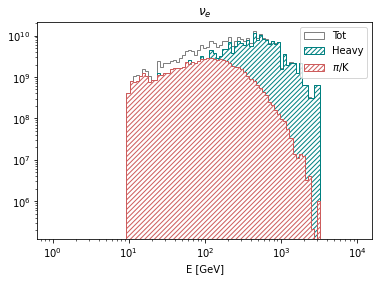

In [539]:
values_el, bins_el, patches_el = plt.hist(kin_el,
         bins = binning_el, align = 'mid',
         weights = weight_el * norm_el,                       
         color = 'white',
         edgecolor = 'grey',
         histtype = histtype, stacked = True,
         label = 'Tot')

# other
values1_el, bins1_el, patches1_el = plt.hist(kin_el1,
         bins = binning_el, align='mid',
         weights = weight_el1 * norm_el,
         color = 'white',
         edgecolor = 'teal',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = 'Heavy')

# pions/kaons
values_not1_el, bins_not1_el, patches_not1_el = plt.hist(kin_el_not1,
         bins = binning_el, align='mid',
         weights = weight_el_not1 * norm_el,
         color = 'white',
         edgecolor = 'indianred',
         histtype = histtype,
         hatch = hatch,stacked = True,
         label = '$\pi$/K')



plt.legend(loc='upper right')
plt.xlabel('E [GeV]')

if limiti:
  plt.xlim([x_down,x_up])
  plt.ylim([y_down,y_up])

plt.xscale(x_scale)
plt.yscale(y_scale)

if grid:
 plt.grid()

plt.title('$\N{greek small letter nu}_e$')



plt.show()

In [599]:
############################
# ENERGIE CINETICHE MEDIE #
###########################

kin_el_avg      = sum(kin_el  * weight_el)      /  sum(weight_el)
kin_el_avg1     = sum(kin_el1 * weight_el1)     /  sum(weight_el1)
kin_el_avg_not1 = sum(kin_el_not1 * weight_el_not1)     /  sum(weight_el_not1)


table_el = [  ['Totale'    ,'Heavy'    , 'pi/K'        ],
              [str( "{:,}".format(int(values_el.sum())))   , str( "{:,}".format(int(values1_el.sum()))), str( "{:,}".format(int(values_not1_el.sum())))  ],   
              ['<E> totale','<E> heavy', '<E> pi/k'       ],
              [kin_el_avg  , kin_el_avg1, kin_el_avg_not1]] 

print(tabulate(table_el, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤════════════════════╤═══════════════════╕
│ Totale            │ Heavy              │ pi/K              │
╞═══════════════════╪════════════════════╪═══════════════════╡
│ 266,648,202,755   │ 193,333,333,333    │ 73,314,869,421    │
├───────────────────┼────────────────────┼───────────────────┤
│ <E> totale        │ <E> heavy          │ <E> pi/k          │
├───────────────────┼────────────────────┼───────────────────┤
│ 397.5726165827831 │ 493.26218127737155 │ 145.2365945243209 │
╘═══════════════════╧════════════════════╧═══════════════════╛


##### Anti-elettronici -----------------------------------------------------------

In [541]:
weight_antiel1 = weight_antiel[ weight_antiel == 1]         # other
weight_antiel_not1 = weight_antiel[ weight_antiel != 1]     # pions/kaons

kin_antiel_not1=kin_antiel[ weight_antiel !=1 ]
kin_antiel1=kin_antiel[ weight_antiel ==1 ]

In [542]:
###############################
### SETTAGGIO DEI GRAFICI ####
##############################

# binning
binning_antiel = 100
binning_antiel = np.linspace(0,10**4,250)
binning_antiel = np.logspace(0,4, 100)

# scale
x_scale = 'log'
y_scale = 'log'                       # log or linear

limiti  = False                       # True o False per decidere se usare o meno i limiti settati dall'utente

x_down  = 100                         # limiti
x_up    = 5000
y_down  = max(values_el) * 1/3000    
y_up    = max(values_el) * 3

grid    = False                       # True or False per avere o no una griglia

histtype= 'stepfilled'                # Tipo di istogramma e trama
hatch   = '/////'

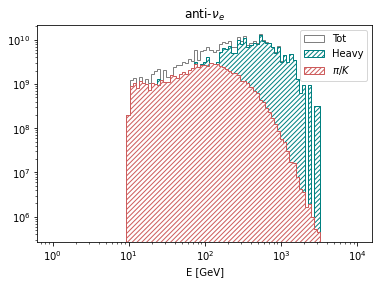

In [543]:
# ISTORGRAMMI
# totale
values_antiel, bins_antiel, patches_antiel = plt.hist(kin_antiel,
         bins = binning_antiel, align = 'mid',
         weights = weight_antiel * norm_el,
         color = 'white',
         edgecolor = 'grey',
         histtype = histtype,stacked = True,
         label = 'Tot')

# other
values1_antiel, bins1_antiel, patches1_antiel = plt.hist(kin_antiel1,
         bins = binning_antiel, align = 'mid',
         weights = weight_antiel1 * norm_el,
         color = 'white',
         edgecolor = 'teal',
         histtype = histtype,
         hatch = hatch,stacked = True,
         label = 'Heavy')

# pions/kaons
values_not1_antiel, bins_not1_antiel, patches_not1_antiel=plt.hist(kin_antiel_not1,
         bins = binning_antiel, align = 'mid',
         weights = weight_antiel_not1 * norm_el,
         color = 'white',
         edgecolor = 'indianred',
         histtype = histtype,
         hatch = hatch,stacked = True,
         label = '$\pi/K$')



plt.legend(loc='upper right')
plt.xlabel('E [GeV]')

if limiti:
  plt.xlim([x_down,x_up])
  plt.ylim([y_down,y_up])

plt.xscale(x_scale)
plt.yscale(y_scale)

if grid:
 plt.grid()

plt.title('anti-$\N{greek small letter nu}_e$')



plt.show()

In [600]:
############################
# ENERGIE CINETICHE MEDIE #
###########################

kin_antiel_avg      = sum(kin_antiel  * weight_antiel)      /  sum(weight_antiel)
kin_antiel_avg1     = sum(kin_antiel1 * weight_antiel1)     /  sum(weight_antiel1)
kin_antiel_avg_not1 = sum(kin_antiel_not1 * weight_antiel_not1)     /  sum(weight_antiel_not1)


table_antiel = [  ['Totale'    ,'Heavy'    , 'pi/K'        ],
              [str( "{:,}".format(int(values_antiel.sum())))   , str( "{:,}".format(int(values1_antiel.sum()))), str( "{:,}".format(int(values_not1_antiel.sum())))  ],   
              ['<E> totale','<E> heavy', '<E> pi/k'       ],
              [kin_antiel_avg  , kin_antiel_avg1, kin_antiel_avg_not1]] 

print(tabulate(table_antiel, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤════════════════════╤════════════════════╕
│ Totale             │ Heavy              │ pi/K               │
╞════════════════════╪════════════════════╪════════════════════╡
│ 283,632,919,722    │ 212,698,412,698    │ 70,934,507,024     │
├────────────────────┼────────────────────┼────────────────────┤
│ <E> totale         │ <E> heavy          │ <E> pi/k           │
├────────────────────┼────────────────────┼────────────────────┤
│ 404.23072863079335 │ 493.14318074435386 │ 137.62511978102705 │
╘════════════════════╧════════════════════╧════════════════════╛


##### Muonici

In [545]:
weight_mu1 = weight_mu[ weight_mu == 1]         # other
weight_mu_not1 = weight_mu[ weight_mu != 1 ]     # pions/kaons

kin_mu_not1=kin_mu[weight_mu!=1]
kin_mu1=kin_mu[weight_mu==1]

In [546]:
###############################
### SETTAGGIO DEI GRAFICI ####
##############################

# binning
binning_mu = 100
binning_mu = np.linspace(0,10**4,250)
binning_mu = np.logspace(0, 4, 100)

# scale
x_scale = 'log'
y_scale = 'log'                       # log or linear

limiti  = False                       # True o False per decidere se usare o meno i limiti settati dall'utente

x_down  = 100                         # limiti
x_up    = 5000
y_down  = max(values_el) * 1/3000    
y_up    = max(values_el) * 3

grid    = False                       # True or False per avere o no una griglia

histtype= 'stepfilled'                # Tipo di istogramma e trama
hatch   = '/////'

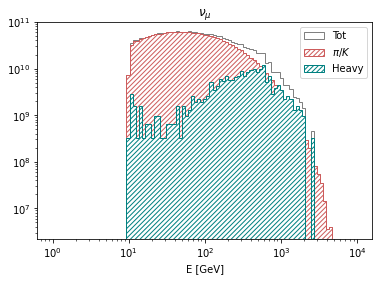

In [547]:
# ISTORGRAMMI
# totale
values_mu, bins_mu, patches_mu = plt.hist(kin_mu,
         bins = binning_mu, align = 'mid',
         weights = weight_mu * norm_el,
         color = 'white',
         edgecolor = 'grey',
         histtype = histtype, stacked = True,
         label = 'Tot')

# pions/kaons
values_not1_mu, bins_not1_mu, patches_not1_mu=plt.hist(kin_mu_not1,
         bins = binning_mu, align = 'mid',
         weights = weight_mu_not1 * norm_el,
         color = 'white',
         edgecolor = 'indianred',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = '$\pi/K$')

# other
values1_mu, bins1_mu, patches1_mu = plt.hist(kin_mu1,
         bins = binning_mu, align = 'mid',
         weights = weight_mu1 * norm_el,
         color = 'white',
         edgecolor = 'teal',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = 'Heavy')



plt.legend(loc='upper right')
plt.xlabel('E [GeV]')

if limiti:
  plt.xlim([x_down,x_up])
  plt.ylim([y_down,y_up])

plt.xscale(x_scale)
plt.yscale(y_scale)

if grid:
 plt.grid()

plt.title('$\N{greek small letter nu}_\N{greek small letter mu}$')



plt.show()

In [601]:
############################
# ENERGIE CINETICHE MEDIE #
###########################

kin_mu_avg      = sum(kin_mu  * weight_mu)      /  sum(weight_mu)
kin_mu_avg1     = sum(kin_mu1 * weight_mu1)     /  sum(weight_mu1)
kin_mu_avg_not1 = sum(kin_mu_not1 * weight_mu_not1)     /  sum(weight_mu_not1)


table_mu = [  ['Totale'    ,'Heavy'    , 'pi/K'        ],
              [str( "{:,}".format(int(values_mu.sum())))   , str( "{:,}".format(int(values1_mu.sum()))), str( "{:,}".format(int(values_not1_mu.sum())))  ],   
              ['<E> totale','<E> heavy', '<E> pi/k'       ],
              [kin_mu_avg  , kin_mu_avg1, kin_mu_avg_not1]] 

print(tabulate(table_mu, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤════════════════════╤════════════════════╕
│ Totale            │ Heavy              │ pi/K               │
╞═══════════════════╪════════════════════╪════════════════════╡
│ 2,156,716,228,158 │ 201,587,301,587    │ 1,955,128,926,571  │
├───────────────────┼────────────────────┼────────────────────┤
│ <E> totale        │ <E> heavy          │ <E> pi/k           │
├───────────────────┼────────────────────┼────────────────────┤
│ 143.0158162288471 │ 422.46639748621334 │ 114.20253039533213 │
╘═══════════════════╧════════════════════╧════════════════════╛


##### Anti-muonici

In [549]:
weight_antimu1 = weight_antimu[ weight_antimu == 1]         # other
weight_antimu_not1 = weight_antimu[ weight_antimu != 1 ]     # pions/kaons

kin_antimu_not1=kin_antimu[weight_antimu!=1]
kin_antimu1=kin_antimu[weight_antimu==1]

In [550]:
###############################
### SETTAGGIO DEI GRAFICI ####
##############################

# binning
binning_antimu = 100
binning_antimu = np.linspace(0,10**4,250)
binning_antimu = np.logspace(0, 4, 100)

# scale
x_scale = 'log'
y_scale = 'log'                       # log or linear

limiti  = False                       # True o False per decidere se usare o meno i limiti settati dall'utente

x_down  = 100                         # limiti
x_up    = 5000
y_down  = max(values_el) * 1/3000    
y_up    = max(values_el) * 3

grid    = False                       # True or False per avere o no una griglia

histtype= 'stepfilled'                # Tipo di istogramma e trama
hatch   = '/////'

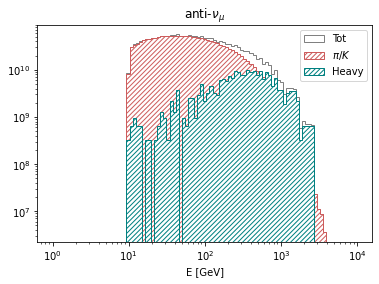

In [551]:
# ISTORGRAMMI
# totale
values_antimu, bins_antimu, patches_antimu = plt.hist(kin_antimu,
         bins = binning_antimu, align = 'mid',
         weights = weight_antimu * norm_el,
         color = 'white',
         edgecolor = 'grey',
         histtype = histtype, stacked = True,
         label = 'Tot')

# pions/kaons
values_not1_antimu, bins_not1_antimu, patches_not1_antimu=plt.hist(kin_antimu_not1,
        bins = binning_antimu, align = 'mid',
         weights = weight_antimu_not1 * norm_el,
         color = 'white',
         edgecolor = 'indianred',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = '$\pi/K$')

# other
values1_antimu, bins1_antimu, patches1_antimu = plt.hist(kin_antimu1,
         bins = binning_antimu, align = 'mid',
         weights = weight_antimu1 * norm_el,
         color = 'white',
         edgecolor = 'teal',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = 'Heavy')



plt.legend(loc='upper right')
plt.xlabel('E [GeV]')

if limiti:
  plt.xlim([x_down,x_up])
  plt.ylim([y_down,y_up])

plt.xscale(x_scale)
plt.yscale(y_scale)

if grid:
 plt.grid()

plt.title('anti-$\N{greek small letter nu}_\N{greek small letter mu}$')



plt.show()

In [602]:
#############################
# ENERGIE CINETICHE MEDIE #
###########################

kin_antimu_avg      = sum(kin_antimu  * weight_antimu)      /  sum(weight_antimu)
kin_antimu_avg1     = sum(kin_antimu1 * weight_antimu1)     /  sum(weight_antimu1)
kin_antimu_avg_not1 = sum(kin_antimu_not1 * weight_antimu_not1)     /  sum(weight_antimu_not1)


table_antimu = [  ['Totale'    ,'Heavy'    , 'pi/K'        ],
              [str( "{:,}".format(int(values_antimu.sum())))   , str( "{:,}".format(int(values1_antimu.sum()))), str( "{:,}".format(int(values_not1_antimu.sum())))  ],   
              ['<E> totale','<E> heavy', '<E> pi/k'       ],
              [kin_antimu_avg  , kin_antimu_avg1, kin_antimu_avg_not1]] 

print(tabulate(table_antimu, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤════════════════════╤════════════════════╕
│ Totale             │ Heavy              │ pi/K               │
╞════════════════════╪════════════════════╪════════════════════╡
│ 1,888,048,609,899  │ 217,460,317,460    │ 1,670,588,292,438  │
├────────────────────┼────────────────────┼────────────────────┤
│ <E> totale         │ <E> heavy          │ <E> pi/k           │
├────────────────────┼────────────────────┼────────────────────┤
│ 143.85605619823556 │ 448.90466928365026 │ 104.14790755226169 │
╘════════════════════╧════════════════════╧════════════════════╛


##### Tau

In [553]:
weight_tau1 = weight_tau[ weight_tau == 1]         # other
weight_tau_not1 = weight_tau[ weight_tau != 1 ]     # pions/kaons

kin_tau_not1=kin_tau[weight_tau!=1]
kin_tau1=kin_tau[weight_tau==1]

In [554]:
###############################
### SETTAGGIO DEI GRAFICI ####
##############################

# binning
binning_tau = 100
binning_tau = np.linspace(0,10**4,250)
binning_tau = np.logspace(0, 4, 100)

# scale
x_scale = 'log'
y_scale = 'log'                       # log or linear

limiti  = False                       # True o False per decidere se usare o meno i limiti settati dall'utente

x_down  = 100                         # limiti
x_up    = 5000
y_down  = max(values_el) * 1/3000    
y_up    = max(values_el) * 3

grid    = False                       # True or False per avere o no una griglia

histtype= 'stepfilled'                # Tipo di istogramma e trama
hatch   = '/////'

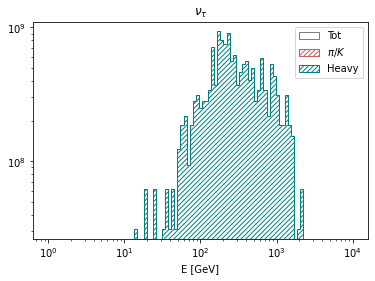

In [555]:
# ISTORGRAMMI
# totale
values_tau, bins_tau, patches_tau = plt.hist(kin_tau,
         bins = binning_tau, align = 'mid',
         weights = weight_tau * norm_tau,
         color = 'white',
         edgecolor = 'grey',
         histtype = histtype, stacked = True,
         label = 'Tot')

# pions/kaons
values_not1_tau, bins_not1_tau, patches_not1_tau=plt.hist(kin_tau_not1,
        bins = binning_tau, align = 'mid',
         weights = weight_tau_not1 * norm_tau,
         color = 'white',
         edgecolor = 'indianred',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = '$\pi/K$')

# other
values1_tau, bins1_tau, patches1_tau = plt.hist(kin_tau1,
         bins = binning_tau, align = 'mid',
         weights = weight_tau1 * norm_tau,
         color = 'white',
         edgecolor = 'teal',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = 'Heavy')



plt.legend(loc='upper right')
plt.xlabel('E [GeV]')

if limiti:
  plt.xlim([x_down,x_up])
  plt.ylim([y_down,y_up])

plt.xscale(x_scale)
plt.yscale(y_scale)

if grid:
 plt.grid()

plt.title('$\N{greek small letter nu}_\N{greek small letter tau}$')



plt.show()

In [606]:
############################
# ENERGIE CINETICHE MEDIE #
###########################

kin_tau_avg      = sum(kin_tau  * weight_tau)      /  sum(weight_tau)

table_tau = [  ['Totale'    ,'Heavy'    , 'pi/K'        ],
              [str( "{:,}".format(int(values_tau.sum())))   , str( "{:,}".format(int(values1_tau.sum()))), str( "{:,}".format(int(values_not1_tau.sum())))  ],   
              ['<E> totale','<E> heavy', '<E> pi/k'       ],
              [kin_tau_avg  , '' ,'' ]] 

print(tabulate(table_tau, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤════════════════╤══════════╕
│ Totale             │ Heavy          │ pi/K     │
╞════════════════════╪════════════════╪══════════╡
│ 15,586,435,756     │ 15,586,435,756 │ 0        │
├────────────────────┼────────────────┼──────────┤
│ <E> totale         │ <E> heavy      │ <E> pi/k │
├────────────────────┼────────────────┼──────────┤
│ 411.93121829039967 │                │          │
╘════════════════════╧════════════════╧══════════╛


##### Anti-tau

In [557]:
weight_antitau1 = weight_antitau[ weight_antitau == 1]         # other
weight_antitau_not1 = weight_antitau[ weight_antitau != 1 ]     # pions/kaons

kin_antitau_not1=kin_antitau[weight_antitau!=1]
kin_antitau1=kin_antitau[weight_antitau==1]

In [558]:
###############################
### SETTAGGIO DEI GRAFICI ####
##############################

# binning
binning_antitau = 100
binning_antitau = np.linspace(0,10**4,250)
binning_antitau = np.logspace(0, 4, 100)

# scale
x_scale = 'log'
y_scale = 'log'                       # log or linear

limiti  = False                       # True o False per decidere se usare o meno i limiti settati dall'utente

x_down  = 100                         # limiti
x_up    = 5000
y_down  = max(values_el) * 1/3000    
y_up    = max(values_el) * 3

grid    = False                       # True or False per avere o no una griglia

histtype= 'stepfilled'                # Tipo di istogramma e trama
hatch   = '/////'

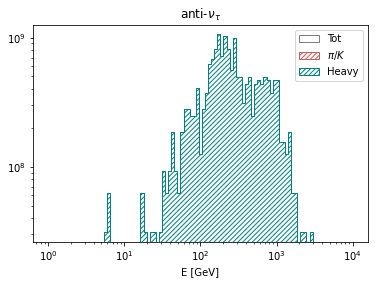

In [559]:
# ISTORGRAMMI
# totale
values_antitau, bins_antitau, patches_antitau = plt.hist(kin_antitau,
         bins = binning_antitau, align = 'mid',
         weights = weight_antitau * norm_antitau,
         color = 'white',
         edgecolor = 'grey',
         histtype = histtype, stacked = True,
         label = 'Tot')

# pions/kaons
values_not1_antitau, bins_not1_antitau, patches_not1_antitau=plt.hist(kin_antitau_not1,
        bins = binning_antitau, align = 'mid',
         weights = weight_antitau_not1 * norm_antitau,
         color = 'white',
         edgecolor = 'indianred',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = '$\pi/K$')

# other
values1_antitau, bins1_antitau, patches1_antitau = plt.hist(kin_antitau1,
         bins = binning_antitau, align = 'mid',
         weights = weight_antitau1 * norm_antitau,
         color = 'white',
         edgecolor = 'teal',
         histtype = histtype,
         hatch = hatch, stacked = True,
         label = 'Heavy')



plt.legend(loc='upper right')
plt.xlabel('E [GeV]')

if limiti:
  plt.xlim([x_down,x_up])
  plt.ylim([y_down,y_up])

plt.xscale(x_scale)
plt.yscale(y_scale)

if grid:
 plt.grid()

plt.title('anti-$\N{greek small letter nu}_\N{greek small letter tau}$')



plt.show()

In [605]:
############################
# ENERGIE CINETICHE MEDIE #
###########################

kin_antitau_avg      = sum(kin_antitau  * weight_antitau)      /  sum(weight_antitau)

table_antitau = [  ['Totale'    ,'Heavy'    , 'pi/K'        ],
              [str( "{:,}".format(int(values_antitau.sum())))   , str( "{:,}".format(int(values1_antitau.sum()))), str( "{:,}".format(int(values_not1_antitau.sum())))  ],   
              ['<E> totale','<E> heavy', '<E> pi/k'       ],
              [kin_antitau_avg  , '' ,'' ]] 

print(tabulate(table_antitau, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤════════════════╤══════════╕
│ Totale            │ Heavy          │ pi/K     │
╞═══════════════════╪════════════════╪══════════╡
│ 17,515,296,069    │ 17,515,296,069 │ 0        │
├───────────────────┼────────────────┼──────────┤
│ <E> totale        │ <E> heavy      │ <E> pi/k │
├───────────────────┼────────────────┼──────────┤
│ 378.8781621291667 │                │          │
╘═══════════════════╧════════════════╧══════════╛


# Sezioni d'urto

In [561]:
##############################
########## FILE #############
#############################

# sezioni d'urto

xsec_el      = uproot.open('nue_xsec.root')
xsec_antiel  = uproot.open('anue_xsec.root')
xsec_mu      = uproot.open('numu_xsec.root')
xsec_antimu  = uproot.open('anumu_xsec.root')
xsec_tau     = uproot.open('nutau_xsec.root')
xsec_antitau = uproot.open('anutau_xsec.root')

In [562]:
############################
##### CHARGED CURRENT #####
###########################

#elettronici 
ccp_el = xsec_el["nu_e_W184/dis_cc_p"]
ccn_el = xsec_el["nu_e_W184/dis_cc_n"]

#antielettronici
ccp_antiel  = xsec_antiel["nu_e_bar_W184/dis_cc_p"]
ccn_antiel  = xsec_antiel["nu_e_bar_W184/dis_cc_n"]

#muonici
ccp_mu = xsec_mu['nu_mu_W184/dis_cc_p']
ccn_mu = xsec_mu['nu_mu_W184/dis_cc_n']

#antimuonici
ccp_antimu = xsec_antimu['nu_mu_bar_W184/dis_cc_p']
ccn_antimu = xsec_antimu['nu_mu_bar_W184/dis_cc_n']

# tau
ccp_tau = xsec_tau['nu_tau_W184/dis_cc_p']
ccn_tau = xsec_tau['nu_tau_W184/dis_cc_n']

#antitau
ccp_antitau = xsec_antitau['nu_tau_bar_W184/dis_cc_p']
ccn_antitau = xsec_antitau['nu_tau_bar_W184/dis_cc_n']

In [563]:
############################
##### NEUTRAL CURRENT #####
###########################

#elettronici 
ncp_el = xsec_el["nu_e_W184/dis_nc_p"]
ncn_el = xsec_el["nu_e_W184/dis_nc_n"]

#antielettronici
ncp_antiel  = xsec_antiel["nu_e_bar_W184/dis_nc_p"]
ncn_antiel  = xsec_antiel["nu_e_bar_W184/dis_nc_n"]

#muonici
ncp_mu = xsec_mu['nu_mu_W184/dis_nc_p']
ncn_mu = xsec_mu['nu_mu_W184/dis_nc_n']

#antimuonici
ncp_antimu = xsec_antimu['nu_mu_bar_W184/dis_nc_p']
ncn_antimu = xsec_antimu['nu_mu_bar_W184/dis_nc_n']

#tau
ncp_tau = xsec_tau['nu_tau_W184/dis_nc_p']
ncn_tau = xsec_tau['nu_tau_W184/dis_nc_n']

#antitau
ncp_antitau = xsec_antitau['nu_tau_bar_W184/dis_nc_p']
ncn_antitau = xsec_antitau['nu_tau_bar_W184/dis_nc_n']

##### Energie e sezioni d'urto CC

In [564]:
#elettronici
energies_ccp_el = ccp_el.member("fX")
xsecs_ccp_el = ccp_el.member("fY")
energies_ccn_el = ccn_el.member("fX")
xsecs_ccn_el = ccn_el.member("fY")

#antielettronici
energies_ccp_antiel = ccp_antiel.member("fX")
xsecs_ccp_antiel = ccp_antiel.member("fY")
energies_ccn_antiel = ccn_antiel.member("fX")
xsecs_ccn_antiel = ccn_antiel.member("fY")

# muonici
energies_ccp_mu = ccp_mu.member('fX')
xsecs_ccp_mu = ccp_mu.member('fY') 
energies_ccn_mu = ccn_mu.member('fX')
xsecs_ccn_mu = ccn_mu.member('fY') 

# antimuonici
energies_ccp_antimu = ccp_antimu.member('fX')
xsecs_ccp_antimu = ccp_antimu.member('fY')
energies_ccn_antimu = ccn_antimu.member('fX')
xsecs_ccn_antimu = ccn_antimu.member('fY') 

# tauonici
energies_ccp_tau = ccp_tau.member('fX')
xsecs_ccp_tau = ccp_tau.member('fY') 
energies_ccn_tau = ccn_tau.member('fX')
xsecs_ccn_tau = ccn_tau.member('fY') 

# antitauonici
energies_ccp_antitau = ccp_antitau.member('fX')
xsecs_ccp_antitau = ccp_antitau.member('fY')
energies_ccn_antitau = ccn_antitau.member('fX')
xsecs_ccn_antitau = ccn_antitau.member('fY') 

##### Energie e sezioni d'urto NC

In [565]:
#elettronici
energies_ncp_el = ncp_el.member("fX")
xsecs_ncp_el = ncp_el.member("fY")
energies_ncn_el = ncn_el.member("fX")
xsecs_ncn_el = ncn_el.member("fY")

#antielettronici
energies_ncp_antiel = ncp_antiel.member("fX")
xsecs_ncp_antiel = ncp_antiel.member("fY")
energies_ncn_antiel = ncn_antiel.member("fX")
xsecs_ncn_antiel = ncn_antiel.member("fY")

# muonici
energies_ncp_mu = ncp_mu.member('fX')
xsecs_ncp_mu = ncp_mu.member('fY') 
energies_ncn_mu = ncn_mu.member('fX')
xsecs_ncn_mu = ncn_mu.member('fY') 

# antimuonici
energies_ncp_antimu = ncp_antimu.member('fX')
xsecs_ncp_antimu = ncp_antimu.member('fY')
energies_ncn_antimu = ncn_antimu.member('fX')
xsecs_ncn_antimu = ncn_antimu.member('fY') 

# tauonici
energies_ncp_tau = ncp_tau.member('fX')
xsecs_ncp_tau = ncp_tau.member('fY') 
energies_ncn_tau = ncn_tau.member('fX')
xsecs_ncn_tau = ncn_tau.member('fY') 

# antitauonici
energies_ncp_antitau = ncp_antitau.member('fX')
xsecs_ncp_antitau = ncp_antitau.member('fY')
energies_ncn_antitau = ncn_antitau.member('fX')
xsecs_ncn_antitau = ncn_antitau.member('fY') 

### Interpolazione

In [566]:
#e e anti-e
int_ccp_antiel = np.interp(binning_antiel, energies_ccp_antiel, xsecs_ccp_antiel * 10)
int_ccp_el     = np.interp(binning_el, energies_ccp_el, xsecs_ccp_el * 10)
int_ccn_antiel = np.interp(binning_antiel, energies_ccn_antiel, xsecs_ccn_antiel * 10)
int_ccn_el     = np.interp(binning_el, energies_ccn_el, xsecs_ccn_el * 10)

#mu e anti-mu
int_ccp_antimu = np.interp(binning_antimu, energies_ccp_antimu, xsecs_ccp_antimu * 10)
int_ccp_mu     = np.interp(binning_mu, energies_ccp_mu, xsecs_ccp_mu * 10)
int_ccn_antimu = np.interp(binning_antimu, energies_ccn_antimu, xsecs_ccn_antimu * 10)
int_ccn_mu     = np.interp(binning_mu, energies_ccn_mu, xsecs_ccn_mu * 10)

#tau e anti-tau
int_ccp_antitau = np.interp(binning_antitau, energies_ccp_antitau, xsecs_ccp_antitau * 10)
int_ccp_tau     = np.interp(binning_tau, energies_ccp_tau, xsecs_ccp_tau * 10)
int_ccn_antitau = np.interp(binning_antitau, energies_ccn_antitau, xsecs_ccn_antitau * 10)
int_ccn_tau     = np.interp(binning_tau, energies_ccn_tau, xsecs_ccn_tau * 10)

# moltiplico le sezioni d'urto per 10 poiché le voglio in fb. Ntau file sono in 10^-38 cm^2 = 10^-14 bn = 10 fb

In [567]:
#e e anti-e
int_ncp_antiel = np.interp(binning_antiel, energies_ncp_antiel, xsecs_ncp_antiel * 10)
int_ncp_el     = np.interp(binning_el, energies_ncp_el, xsecs_ncp_el * 10)
int_ncn_antiel = np.interp(binning_antiel, energies_ncn_antiel, xsecs_ncn_antiel * 10)
int_ncn_el     = np.interp(binning_el, energies_ncn_el, xsecs_ncn_el * 10)

#mu e anti-mu
int_ncp_antimu = np.interp(binning_antimu, energies_ncp_antimu, xsecs_ncp_antimu * 10)
int_ncp_mu     = np.interp(binning_mu, energies_ncp_mu, xsecs_ncp_mu * 10)
int_ncn_antimu = np.interp(binning_antimu, energies_ncn_antimu, xsecs_ncn_antimu * 10)
int_ncn_mu     = np.interp(binning_mu, energies_ncn_mu, xsecs_ncn_mu * 10)

#tau e anti-tau
int_ncp_antitau = np.interp(binning_antitau, energies_ncp_antitau, xsecs_ncp_antitau * 10)
int_ncp_tau     = np.interp(binning_tau, energies_ncp_tau, xsecs_ncp_tau * 10)
int_ncn_antitau = np.interp(binning_antitau, energies_ncn_antitau, xsecs_ncn_antitau * 10)
int_ncn_tau     = np.interp(binning_tau, energies_ncn_tau, xsecs_ncn_tau * 10)

# Convoluzioni

### Dagli spettri alle luminosità

In [568]:
################################
######## coefficiente #########
##############################à

# length = 295 mm = 29,5 cm
# Area = 1474.56 cm^2 = 1474.56 * 10**24 fb
# density = 19,3 g/cm^3
# L_int = [Spettro/(8*10**13)*]/*(1/1568.16)*(29.5)*(6.022*10**23)
# A = 184
# Mass = 800 kg

const_el = norm_el * 800 * (1/184) * (1/1474.56) * (6.022 * 10**23) *(10**-39) * 1000
const_antiel = norm_antiel * 800 * (1/184) * (1/1474.56) * (6.022 * 10**23) *(10**-39) * 1000
const_mu = norm_mu * 800 * (1/184) * (1/1474.56) * (6.022 * 10**23) *(10**-39) * 1000
const_antimu = norm_antimu * 800 * (1/184) * (1/1474.56) * (6.022 * 10**23) *(10**-39) * 1000
const_tau = norm_tau * 800 * (1/184) * (1/1474.56) * (6.022 * 10**23) *(10**-39) * 1000
const_antitau = norm_antitau * 800 * (1/184) * (1/1474.56) * (6.022 * 10**23) *(10**-39) * 1000

#################################
### istogrammi luminosità  #####
################################

logspace_el= (binning_el[0:-1] + binning_el[1:])/2
logspace_antiel= (binning_antiel[0:-1] + binning_antiel[1:])/2
logspace_mu= (binning_mu[0:-1] + binning_mu[1:])/2
logspace_antimu= (binning_antimu[0:-1] + binning_antimu[1:])/2
logspace_tau= (binning_tau[0:-1] + binning_tau[1:])/2
logspace_antitau= (binning_antitau[0:-1] + binning_antitau[1:])/2


#elettronici
n_el, bins_el           = np.histogram(np.array(kin_el)     , logspace_el,  weights=np.array(weight_el      * const_el))
n_el1, bins_el1         = np.histogram(np.array(kin_el1)    , logspace_el,  weights=np.array(weight_el1     * const_el))
n_el_not1, bins_el_not1 = np.histogram(np.array(kin_el_not1), logspace_el,  weights=np.array(weight_el_not1 * const_el))

#antielettronici
n_antiel, bins_antiel           = np.histogram(np.array(kin_antiel)     , logspace_antiel,  weights=np.array(weight_antiel      * const_antiel))
n_antiel1, bins_antiel1         = np.histogram(np.array(kin_antiel1)    , logspace_antiel,  weights=np.array(weight_antiel1     * const_antiel))
n_antiel_not1, bins_antiel_not1 = np.histogram(np.array(kin_antiel_not1), logspace_antiel,  weights=np.array(weight_antiel_not1 * const_antiel))

#muonici
n_mu, bins_mu           = np.histogram(np.array(kin_mu)     , logspace_mu,  weights=np.array(weight_mu      * const_mu))
n_mu1, bins_mu1         = np.histogram(np.array(kin_mu1)    , logspace_mu,  weights=np.array(weight_mu1     * const_mu))
n_mu_not1, bins_mu_not1 = np.histogram(np.array(kin_mu_not1), logspace_mu,  weights=np.array(weight_mu_not1 * const_mu))

#antimuonici
n_antimu, bins_antimu           = np.histogram(np.array(kin_antimu)     , logspace_antimu,  weights=np.array(weight_antimu      * const_antimu))
n_antimu1, bins_antimu1         = np.histogram(np.array(kin_antimu1)    , logspace_antimu,  weights=np.array(weight_antimu1     * const_antimu))
n_antimu_not1, bins_antimu_not1 = np.histogram(np.array(kin_antimu_not1), logspace_antimu,  weights=np.array(weight_antimu_not1 * const_antimu))

#tauonici
n_tau, bins_tau           = np.histogram(np.array(kin_tau)     , logspace_tau,  weights=np.array(weight_tau      * const_tau))
n_tau1, bins_tau1         = np.histogram(np.array(kin_tau1)    , logspace_tau,  weights=np.array(weight_tau1     * const_tau))
n_tau_not1, bins_tau_not1 = np.histogram(np.array(kin_tau_not1), logspace_tau,  weights=np.array(weight_tau_not1 * const_tau))

#antitauonici
n_antitau, bins_antitau           = np.histogram(np.array(kin_antitau)     , logspace_antitau,  weights=np.array(weight_antitau      * const_antitau))
n_antitau1, bins_antitau1         = np.histogram(np.array(kin_antitau1)    , logspace_antitau,  weights=np.array(weight_antitau1     * const_antitau))
n_antitau_not1, bins_antitau_not1 = np.histogram(np.array(kin_antitau_not1), logspace_antitau,  weights=np.array(weight_antitau_not1 * const_antitau))

In [569]:
def convolve(xsec, values): 
    print((np.array(xsec) * np.array(values)).sum())
    return (np.array(xsec) * np.array(values))

##### Elettronici ----------------------------------------------------------------

---------------- CC ν_e ---------------------

Totale interazioni con protoni
55.054482854030084

Totale interazioni con neturoni
154.1646885832644

Heavy interazioni con protoni
49.337059557823736

Heavy interazioni con neturoni
137.82018427783896

π/K interazioni con protoni
5.717423296206208

π/K interazioni con neturoni
16.344504305425026



TOTALE CC DIS 209.21917143729448


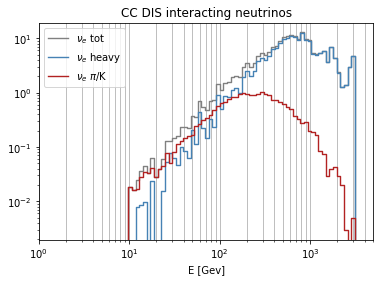

energia media CC neutrini elonici 806.237800751016


In [623]:
print('---------------- CC \N{greek small letter nu}_e ---------------------')

#totale
print('\nTotale interazioni con protoni')
CC_conv_el_p = convolve(int_ccp_el[1: -1], n_el)

print('\nTotale interazioni con neturoni')
CC_conv_el_n = convolve(int_ccn_el[1: -1], n_el)

#heavy
print('\nHeavy interazioni con protoni')
CC_conv_el_p1 = convolve(int_ccp_el[1: -1], n_el1)

print('\nHeavy interazioni con neturoni')
CC_conv_el_n1 = convolve(int_ccn_el[1: -1], n_el1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
CC_conv_el_p_not1 = convolve(int_ccp_el[1: -1], n_el_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
CC_conv_el_n_not1 = convolve(int_ccn_el[1: -1], n_el_not1)

CC_TOT_EL = CC_conv_el_p.sum()+CC_conv_el_n.sum()
print('\n\n\nTOTALE CC DIS',CC_TOT_EL)



plt.plot(binning_el[1: -1], 
         CC_conv_el_p + CC_conv_el_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_el[1: -1], 
         CC_conv_el_p1 + CC_conv_el_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_el[1: -1], 
         CC_conv_el_p_not1 + CC_conv_el_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('CC DIS interacting neutrinos')
plt.show()

CC_kin_el_mean = ( binning_el[1: -1] * (CC_conv_el_p + CC_conv_el_n) ).sum()/(CC_conv_el_p + CC_conv_el_n).sum()
print('energia media CC neutrini elonici', CC_kin_el_mean)

---------------- NC ν_e ---------------------

Totale interazioni con protoni
26.403476507398473

Totale interazioni con neturoni
43.29816392154065

Heavy interazioni con protoni
23.68398829631833

Heavy interazioni con neturoni
38.81878189005988

π/K interazioni con protoni
2.7194882110800735

π/K interazioni con neturoni
4.479382031480657



TOTALE NC DIS 69.55225276591143


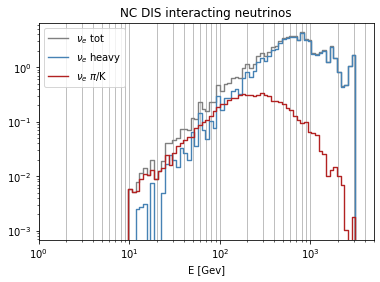

energia media NC neutrini elonici 819.1020936577862


In [624]:
print('---------------- NC \N{greek small letter nu}_e ---------------------')

#totale
print('\nTotale interazioni con protoni')
NC_conv_el_p = convolve(int_ncp_el[1: -1], n_el)

print('\nTotale interazioni con neturoni')
NC_conv_el_n = convolve(int_ncn_el[1: -1], n_el)

#heavy
print('\nHeavy interazioni con protoni')
NC_conv_el_p1 = convolve(int_ncp_el[1: -1], n_el1)

print('\nHeavy interazioni con neturoni')
NC_conv_el_n1 = convolve(int_ncn_el[1: -1], n_el1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
NC_conv_el_p_not1 = convolve(int_ncp_el[1: -1], n_el_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
NC_conv_el_n_not1 = convolve(int_ncn_el[1: -1], n_el_not1)

NC_TOT_EL = nc_conv_el_p.sum()+nc_conv_el_n.sum()
print('\n\n\nTOTALE NC DIS',NC_TOT_EL)


plt.plot(binning_el[1: -1], 
         NC_conv_el_p + NC_conv_el_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_el[1: -1], 
         NC_conv_el_p1 + NC_conv_el_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_el[1: -1], 
         NC_conv_el_p_not1 + NC_conv_el_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('NC DIS interacting neutrinos')
plt.show()

NC_kin_el_mean = ( binning_el[1: -1] * (NC_conv_el_p + NC_conv_el_n) ).sum()/(NC_conv_el_p + NC_conv_el_n).sum()
print('energia media NC neutrini elonici', NC_kin_el_mean)

##### Anti-elettronici ----------------------------------------------------------------------

---------------- CC anti-ν_e ---------------------

Totale interazioni con protoni
54.96726533958784

Totale interazioni con neturoni
48.602844455693656

Heavy interazioni con protoni
50.24481097925744

Heavy interazioni con neturoni
44.51924355318609

π/K interazioni con protoni
4.722454360331046

π/K interazioni con neturoni
4.083600902508161



TOTALE CC DIS 103.5701097952815


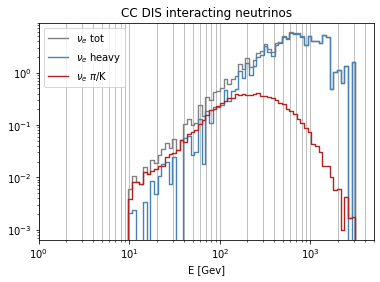

energia media CC neutrini antielonici 795.5657991484137


In [625]:
print('---------------- CC anti-\N{greek small letter nu}_e ---------------------')

#totale
print('\nTotale interazioni con protoni')
CC_conv_antiel_p = convolve(int_ccp_antiel[1: -1], n_antiel)

print('\nTotale interazioni con neturoni')
CC_conv_antiel_n = convolve(int_ccn_antiel[1: -1], n_antiel)

#heavy
print('\nHeavy interazioni con protoni')
CC_conv_antiel_p1 = convolve(int_ccp_antiel[1: -1], n_antiel1)

print('\nHeavy interazioni con neturoni')
CC_conv_antiel_n1 = convolve(int_ccn_antiel[1: -1], n_antiel1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
CC_conv_antiel_p_not1 = convolve(int_ccp_antiel[1: -1], n_antiel_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
CC_conv_antiel_n_not1 = convolve(int_ccn_antiel[1: -1], n_antiel_not1)

CC_TOT_ANTIEL = CC_conv_antiel_p.sum()+CC_conv_antiel_n.sum()
print('\n\n\nTOTALE CC DIS',CC_TOT_ANTIEL)



plt.plot(binning_antiel[1: -1], 
         CC_conv_antiel_p + CC_conv_antiel_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_antiel[1: -1], 
         CC_conv_antiel_p1 + CC_conv_antiel_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_antiel[1: -1], 
         CC_conv_antiel_p_not1 + CC_conv_antiel_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('CC DIS interacting neutrinos')
plt.show()

CC_kin_antiel_mean = ( binning_antiel[1: -1] * (CC_conv_antiel_p + CC_conv_antiel_n) ).sum()/(CC_conv_antiel_p + CC_conv_antiel_n).sum()
print('energia media CC neutrini antielonici', CC_kin_antiel_mean)

---------------- NC anti-ν_e ---------------------

Totale interazioni con protoni
17.277554744932033

Totale interazioni con neturoni
25.74082060496051

Heavy interazioni con protoni
15.823101917534231

Heavy interazioni con neturoni
23.5745817813864

π/K interazioni con protoni
1.4544528273980097

π/K interazioni con neturoni
2.16623882357442



TOTALE NC DIS 43.018375349892544


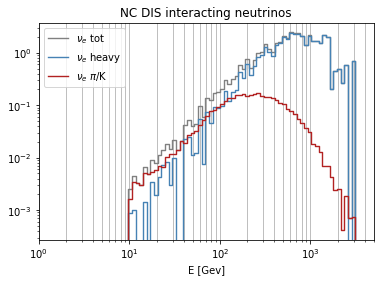

energia media NC neutrini antielonici 800.3365012958984


In [626]:
print('---------------- NC anti-\N{greek small letter nu}_e ---------------------')

#totale
print('\nTotale interazioni con protoni')
NC_conv_antiel_p = convolve(int_ncp_antiel[1: -1], n_antiel)

print('\nTotale interazioni con neturoni')
NC_conv_antiel_n = convolve(int_ncn_antiel[1: -1], n_antiel)

#heavy
print('\nHeavy interazioni con protoni')
NC_conv_antiel_p1 = convolve(int_ncp_antiel[1: -1], n_antiel1)

print('\nHeavy interazioni con neturoni')
NC_conv_antiel_n1 = convolve(int_ncn_antiel[1: -1], n_antiel1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
NC_conv_antiel_p_not1 = convolve(int_ncp_antiel[1: -1], n_antiel_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
NC_conv_antiel_n_not1 = convolve(int_ncn_antiel[1: -1], n_antiel_not1)

NC_TOT_ANTIEL = NC_conv_antiel_p.sum()+NC_conv_antiel_n.sum()
print('\n\n\nTOTALE NC DIS',NC_TOT_ANTIEL)


plt.plot(binning_antiel[1: -1], 
         NC_conv_antiel_p + NC_conv_antiel_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_antiel[1: -1], 
         NC_conv_antiel_p1 + NC_conv_antiel_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_antiel[1: -1], 
         NC_conv_antiel_p_not1 + NC_conv_antiel_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('NC DIS interacting neutrinos')
plt.show()

NC_kin_antiel_mean = ( binning_antiel[1: -1] * (NC_conv_antiel_p + NC_conv_antiel_n) ).sum()/(NC_conv_antiel_p + NC_conv_antiel_n).sum()
print('energia media NC neutrini antielonici', NC_kin_antiel_mean)

##### Muonici -----------------------------------------------------------------------

---------------- CC ν_μ ---------------------

Totale interazioni con protoni
163.70110821739286

Totale interazioni con neturoni
465.8509408530955

Heavy interazioni con protoni
44.507590245774246

Heavy interazioni con neturoni
124.83244790389162

π/K interazioni con protoni
119.19351797162061

π/K interazioni con neturoni
341.01849294920925



TOTALE CC DIS 629.5520490704884


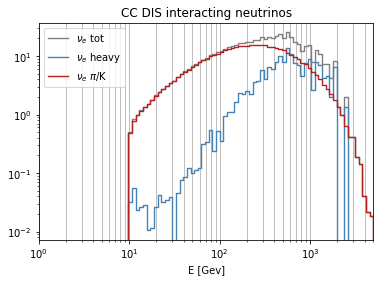

energia media CC neutrini muonici 446.27159875380227


In [627]:
print('---------------- CC \N{greek small letter nu}_\N{greek small letter mu} ---------------------')

#totale
print('\nTotale interazioni con protoni')
CC_conv_mu_p = convolve(int_ccp_mu[1: -1], n_mu)

print('\nTotale interazioni con neturoni')
CC_conv_mu_n = convolve(int_ccn_mu[1: -1], n_mu)

#heavy
print('\nHeavy interazioni con protoni')
CC_conv_mu_p1 = convolve(int_ccp_mu[1: -1], n_mu1)

print('\nHeavy interazioni con neturoni')
CC_conv_mu_n1 = convolve(int_ccn_mu[1: -1], n_mu1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
CC_conv_mu_p_not1 = convolve(int_ccp_mu[1: -1], n_mu_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
CC_conv_mu_n_not1 = convolve(int_ccn_mu[1: -1], n_mu_not1)

CC_TOT_MU = CC_conv_mu_p.sum()+CC_conv_mu_n.sum()
print('\n\n\nTOTALE CC DIS',CC_TOT_MU)



plt.plot(binning_mu[1: -1], 
         CC_conv_mu_p + CC_conv_mu_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_mu[1: -1], 
         CC_conv_mu_p1 + CC_conv_mu_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_mu[1: -1], 
         CC_conv_mu_p_not1 + CC_conv_mu_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('CC DIS interacting neutrinos')
plt.show()

CC_kin_mu_mean = ( binning_mu[1: -1] * (CC_conv_mu_p + CC_conv_mu_n) ).sum()/(CC_conv_mu_p + CC_conv_mu_n).sum()
print('energia media CC neutrini muonici', CC_kin_mu_mean)

---------------- NC ν_μ ---------------------

Totale interazioni con protoni
78.11663457675644

Totale interazioni con neturoni
128.5404066417992

Heavy interazioni con protoni
21.32909465268113

Heavy interazioni con neturoni
34.98709955452287

π/K interazioni con protoni
56.7875399240763

π/K interazioni con neturoni
93.55330708727794



TOTALE NC DIS 206.65704121855563


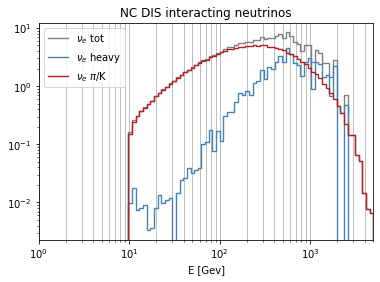

energia media NC neutrini muonici 454.4802528898761


In [628]:
print('---------------- NC \N{greek small letter nu}_\N{greek small letter mu} ---------------------')

#totale
print('\nTotale interazioni con protoni')
NC_conv_mu_p = convolve(int_ncp_mu[1: -1], n_mu)

print('\nTotale interazioni con neturoni')
NC_conv_mu_n = convolve(int_ncn_mu[1: -1], n_mu)

#heavy
print('\nHeavy interazioni con protoni')
NC_conv_mu_p1 = convolve(int_ncp_mu[1: -1], n_mu1)

print('\nHeavy interazioni con neturoni')
NC_conv_mu_n1 = convolve(int_ncn_mu[1: -1], n_mu1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
NC_conv_mu_p_not1 = convolve(int_ncp_mu[1: -1], n_mu_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
NC_conv_mu_n_not1 = convolve(int_ncn_mu[1: -1], n_mu_not1)

NC_TOT_MU = NC_conv_mu_p.sum()+NC_conv_mu_n.sum()
print('\n\n\nTOTALE NC DIS',NC_TOT_MU)


plt.plot(binning_mu[1: -1], 
         NC_conv_mu_p + NC_conv_mu_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_mu[1: -1], 
         NC_conv_mu_p1 + NC_conv_mu_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_mu[1: -1], 
         NC_conv_mu_p_not1 + NC_conv_mu_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('NC DIS interacting neutrinos')
plt.show()

NC_kin_mu_mean = ( binning_mu[1: -1] * (NC_conv_mu_p + NC_conv_mu_n) ).sum()/(NC_conv_mu_p + NC_conv_mu_n).sum()
print('energia media NC neutrini muonici', NC_kin_mu_mean)

##### Anti-muonici ------------------------------------------------------------------------------------

---------------- CC anti-ν_μ ---------------------

Totale interazioni con protoni
130.09569720405247

Totale interazioni con neturoni
113.3044747934193

Heavy interazioni con protoni
46.7479388399359

Heavy interazioni con neturoni
41.357590013806785

π/K interazioni con protoni
83.34775836411656

π/K interazioni con neturoni
71.94688477961249



TOTALE CC DIS 243.40017199747177


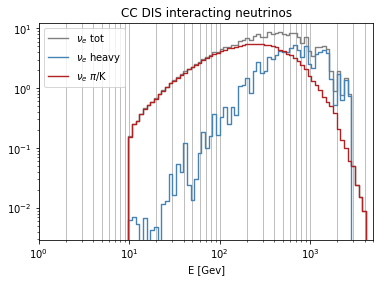

energia media CC neutrini antimuonici 489.07249284741266


In [629]:
print('---------------- CC anti-\N{greek small letter nu}_\N{greek small letter mu} ---------------------')

#totale
print('\nTotale interazioni con protoni')
CC_conv_antimu_p = convolve(int_ccp_antimu[1: -1], n_antimu)

print('\nTotale interazioni con neturoni')
CC_conv_antimu_n = convolve(int_ccn_antimu[1: -1], n_antimu)

#heavy
print('\nHeavy interazioni con protoni')
CC_conv_antimu_p1 = convolve(int_ccp_antimu[1: -1], n_antimu1)

print('\nHeavy interazioni con neturoni')
CC_conv_antimu_n1 = convolve(int_ccn_antimu[1: -1], n_antimu1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
CC_conv_antimu_p_not1 = convolve(int_ccp_antimu[1: -1], n_antimu_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
CC_conv_antimu_n_not1 = convolve(int_ccn_antimu[1: -1], n_antimu_not1)

CC_TOT_ANTIMU = CC_conv_antimu_p.sum()+CC_conv_antimu_n.sum()
print('\n\n\nTOTALE CC DIS',CC_TOT_ANTIMU)



plt.plot(binning_antimu[1: -1], 
         CC_conv_antimu_p + CC_conv_antimu_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_antimu[1: -1], 
         CC_conv_antimu_p1 + CC_conv_antimu_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_antimu[1: -1], 
         CC_conv_antimu_p_not1 + CC_conv_antimu_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('CC DIS interacting neutrinos')
plt.show()

CC_kin_antimu_mean = ( binning_antimu[1: -1] * (CC_conv_antimu_p + CC_conv_antimu_n) ).sum()/(CC_conv_antimu_p + CC_conv_antimu_n).sum()
print('energia media CC neutrini antimuonici', CC_kin_antimu_mean)

---------------- NC anti-ν_μ ---------------------

Totale interazioni con protoni
40.39499759616556

Totale interazioni con neturoni
60.16521253803181

Heavy interazioni con protoni
14.708497058699237

Heavy interazioni con neturoni
21.91343400632658

π/K interazioni con protoni
25.686500537466323

π/K interazioni con neturoni
38.25177853170523



TOTALE NC DIS 100.56021013419738


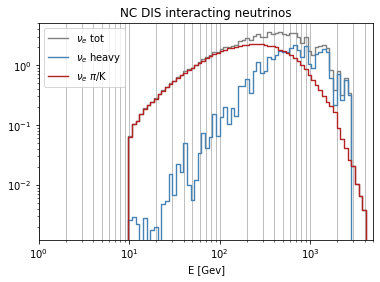

energia media NC neutrini antimuonici 493.0906105753408


In [630]:
print('---------------- NC anti-\N{greek small letter nu}_\N{greek small letter mu} ---------------------')

#totale
print('\nTotale interazioni con protoni')
NC_conv_antimu_p = convolve(int_ncp_antimu[1: -1], n_antimu)

print('\nTotale interazioni con neturoni')
NC_conv_antimu_n = convolve(int_ncn_antimu[1: -1], n_antimu)

#heavy
print('\nHeavy interazioni con protoni')
NC_conv_antimu_p1 = convolve(int_ncp_antimu[1: -1], n_antimu1)

print('\nHeavy interazioni con neturoni')
NC_conv_antimu_n1 = convolve(int_ncn_antimu[1: -1], n_antimu1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
NC_conv_antimu_p_not1 = convolve(int_ncp_antimu[1: -1], n_antimu_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
NC_conv_antimu_n_not1 = convolve(int_ncn_antimu[1: -1], n_antimu_not1)

NC_TOT_ANTIMU = NC_conv_antimu_p.sum()+NC_conv_antimu_n.sum()
print('\n\n\nTOTALE NC DIS',NC_TOT_ANTIMU)


plt.plot(binning_antimu[1: -1], 
         NC_conv_antimu_p + NC_conv_antimu_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_antimu[1: -1], 
         NC_conv_antimu_p1 + NC_conv_antimu_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_antimu[1: -1], 
         NC_conv_antimu_p_not1 + NC_conv_antimu_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('NC DIS interacting neutrinos')
plt.show()

NC_kin_antimu_mean = ( binning_antimu[1: -1] * (NC_conv_antimu_p + NC_conv_antimu_n) ).sum()/(NC_conv_antimu_p + NC_conv_antimu_n).sum()
print('energia media NC neutrini antimuonici', NC_kin_antimu_mean)

##### Tauonici ---------------------------------------------------------------------

---------------- CC ν_τ ---------------------

Totale interazioni con protoni
3.0120139211318673

Totale interazioni con neturoni
8.660909521186493

Heavy interazioni con protoni
3.0120139211318673

Heavy interazioni con neturoni
8.660909521186493

π/K interazioni con protoni
0.0

π/K interazioni con neturoni
0.0



TOTALE CC DIS 11.67292344231836


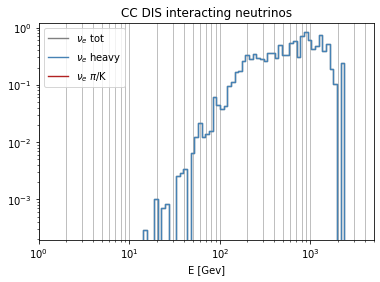

energia media CC neutrini tauonici 753.6733355459185


In [631]:
print('---------------- CC \N{greek small letter nu}_\N{greek small letter tau} ---------------------')

#totale
print('\nTotale interazioni con protoni')
CC_conv_tau_p = convolve(int_ccp_tau[1: -1], n_tau)

print('\nTotale interazioni con neturoni')
CC_conv_tau_n = convolve(int_ccn_tau[1: -1], n_tau)

#heavy
print('\nHeavy interazioni con protoni')
CC_conv_tau_p1 = convolve(int_ccp_tau[1: -1], n_tau1)

print('\nHeavy interazioni con neturoni')
CC_conv_tau_n1 = convolve(int_ccn_tau[1: -1], n_tau1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
CC_conv_tau_p_not1 = convolve(int_ccp_tau[1: -1], n_tau_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
CC_conv_tau_n_not1 = convolve(int_ccn_tau[1: -1], n_tau_not1)

CC_TOT_TAU = CC_conv_tau_p.sum()+CC_conv_tau_n.sum()
print('\n\n\nTOTALE CC DIS',CC_TOT_TAU)



plt.plot(binning_tau[1: -1], 
         CC_conv_tau_p + CC_conv_tau_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_tau[1: -1], 
         CC_conv_tau_p1 + CC_conv_tau_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_tau[1: -1], 
         CC_conv_tau_p_not1 + CC_conv_tau_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('CC DIS interacting neutrinos')
plt.show()

CC_kin_tau_mean = ( binning_tau[1: -1] * (CC_conv_tau_p + CC_conv_tau_n) ).sum()/(CC_conv_tau_p + CC_conv_tau_n).sum()
print('energia media CC neutrini tauonici', CC_kin_tau_mean)

---------------- NC ν_τ ---------------------

Totale interazioni con protoni
1.5991256144702903

Totale interazioni con neturoni
2.623033709935207

Heavy interazioni con protoni
1.5991256144702903

Heavy interazioni con neturoni
2.623033709935207

π/K interazioni con protoni
0.0

π/K interazioni con neturoni
0.0



TOTALE NC DIS 4.222159324405498


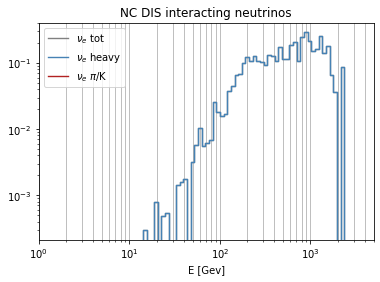

energia media NC neutrini tauonici 741.1500325394878


In [632]:
print('---------------- NC \N{greek small letter nu}_\N{greek small letter tau} ---------------------')

#totale
print('\nTotale interazioni con protoni')
NC_conv_tau_p = convolve(int_ncp_tau[1: -1], n_tau)

print('\nTotale interazioni con neturoni')
NC_conv_tau_n = convolve(int_ncn_tau[1: -1], n_tau)

#heavy
print('\nHeavy interazioni con protoni')
NC_conv_tau_p1 = convolve(int_ncp_tau[1: -1], n_tau1)

print('\nHeavy interazioni con neturoni')
NC_conv_tau_n1 = convolve(int_ncn_tau[1: -1], n_tau1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
NC_conv_tau_p_not1 = convolve(int_ncp_tau[1: -1], n_tau_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
NC_conv_tau_n_not1 = convolve(int_ncn_tau[1: -1], n_tau_not1)

NC_TOT_TAU = NC_conv_tau_p.sum()+NC_conv_tau_n.sum()
print('\n\n\nTOTALE NC DIS',NC_TOT_TAU)


plt.plot(binning_tau[1: -1], 
         NC_conv_tau_p + NC_conv_tau_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_tau[1: -1], 
         NC_conv_tau_p1 + NC_conv_tau_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_tau[1: -1], 
         NC_conv_tau_p_not1 + NC_conv_tau_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('NC DIS interacting neutrinos')
plt.show()

NC_kin_tau_mean = ( binning_tau[1: -1] * (NC_conv_tau_p + NC_conv_tau_n) ).sum()/(NC_conv_tau_p + NC_conv_tau_n).sum()
print('energia media NC neutrini tauonici', NC_kin_tau_mean)

##### Anti-tauonici

---------------- CC anti-ν_τ ---------------------

Totale interazioni con protoni
2.913719304819973

Totale interazioni con neturoni
2.4800656991806616

Heavy interazioni con protoni
2.913719304819973

Heavy interazioni con neturoni
2.4800656991806616

π/K interazioni con protoni
0.0

π/K interazioni con neturoni
0.0



TOTALE CC DIS 5.393785004000635


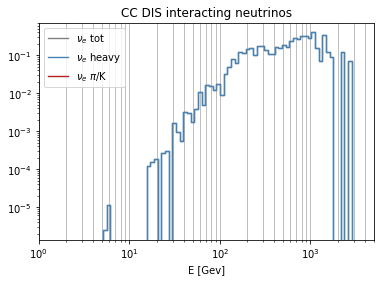

energia media CC neutrini antitauonici 748.9953862885607


In [633]:
print('---------------- CC anti-\N{greek small letter nu}_\N{greek small letter tau} ---------------------')

#totale
print('\nTotale interazioni con protoni')
CC_conv_antitau_p = convolve(int_ccp_antitau[1: -1], n_antitau)

print('\nTotale interazioni con neturoni')
CC_conv_antitau_n = convolve(int_ccn_antitau[1: -1], n_antitau)

#heavy
print('\nHeavy interazioni con protoni')
CC_conv_antitau_p1 = convolve(int_ccp_antitau[1: -1], n_antitau1)

print('\nHeavy interazioni con neturoni')
CC_conv_antitau_n1 = convolve(int_ccn_antitau[1: -1], n_antitau1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
CC_conv_antitau_p_not1 = convolve(int_ccp_antitau[1: -1], n_antitau_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
CC_conv_antitau_n_not1 = convolve(int_ccn_antitau[1: -1], n_antitau_not1)

CC_TOT_ANTITAU = CC_conv_antitau_p.sum()+CC_conv_antitau_n.sum()
print('\n\n\nTOTALE CC DIS',CC_TOT_ANTITAU)



plt.plot(binning_antitau[1: -1], 
         CC_conv_antitau_p + CC_conv_antitau_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_antitau[1: -1], 
         CC_conv_antitau_p1 + CC_conv_antitau_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_antitau[1: -1], 
         CC_conv_antitau_p_not1 + CC_conv_antitau_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('CC DIS interacting neutrinos')
plt.show()

CC_kin_antitau_mean = ( binning_antitau[1: -1] * (CC_conv_antitau_p + CC_conv_antitau_n) ).sum()/(CC_conv_antitau_p + CC_conv_antitau_n).sum()
print('energia media CC neutrini antitauonici', CC_kin_antitau_mean)

---------------- NC anti-ν_τ ---------------------

Totale interazioni con protoni
1.0019514793532847

Totale interazioni con neturoni
1.4927047395111823

Heavy interazioni con protoni
1.0019514793532847

Heavy interazioni con neturoni
1.4927047395111823

π/K interazioni con protoni
0.0

π/K interazioni con neturoni
0.0



TOTALE NC DIS 2.494656218864467


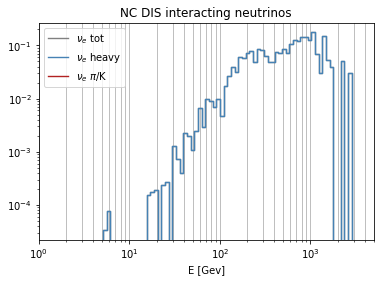

energia media NC neutrini antitauonici 728.2171580899114


In [634]:
print('---------------- NC anti-\N{greek small letter nu}_\N{greek small letter tau} ---------------------')

#totale
print('\nTotale interazioni con protoni')
NC_conv_antitau_p = convolve(int_ncp_antitau[1: -1], n_antitau)

print('\nTotale interazioni con neturoni')
NC_conv_antitau_n = convolve(int_ncn_antitau[1: -1], n_antitau)

#heavy
print('\nHeavy interazioni con protoni')
NC_conv_antitau_p1 = convolve(int_ncp_antitau[1: -1], n_antitau1)

print('\nHeavy interazioni con neturoni')
NC_conv_antitau_n1 = convolve(int_ncn_antitau[1: -1], n_antitau1)


# pioni/kaoni
print('\n\N{greek small letter pi}/K interazioni con protoni') 
NC_conv_antitau_p_not1 = convolve(int_ncp_antitau[1: -1], n_antitau_not1)

print('\n\N{greek small letter pi}/K interazioni con neturoni')
NC_conv_antitau_n_not1 = convolve(int_ncn_antitau[1: -1], n_antitau_not1)

NC_TOT_ANTITAU = NC_conv_antitau_p.sum()+NC_conv_antitau_n.sum()
print('\n\n\nTOTALE NC DIS',NC_TOT_ANTITAU)


plt.plot(binning_antitau[1: -1], 
         NC_conv_antitau_p + NC_conv_antitau_n,                 
         drawstyle = 'steps-mid', color = 'grey', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ tot')


plt.plot(binning_antitau[1: -1], 
         NC_conv_antitau_p1 + NC_conv_antitau_n1,                
         drawstyle = 'steps-mid', color = 'steelblue', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ heavy')


plt.plot(binning_antitau[1: -1], 
         NC_conv_antitau_p_not1 + NC_conv_antitau_n_not1,                 
         drawstyle = 'steps-mid', color = 'firebrick', linestyle = '-', linewidth=1.39,
         label = '$\N{greek small letter nu}_e$ $\pi$/K')

plt.xlabel('E [Gev]')
plt.xlim([1, 5000])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid('True',axis='x',which='both')
plt.title('NC DIS interacting neutrinos')
plt.show()

NC_kin_antitau_mean = ( binning_antitau[1: -1] * (NC_conv_antitau_p + NC_conv_antitau_n) ).sum()/(NC_conv_antitau_p + NC_conv_antitau_n).sum()
print('energia media NC neutrini antitauonici', NC_kin_antitau_mean)

# Riassunto

In [643]:
TABELLONE =[ ['' ,'Incidenti'  , ''  , 'CC DIS'    ,''       , 'NC DIS'    , ''    ],     
             ['' , '<E> [Gev]' , '#' , '<E> [Gev]' , '#'     , '<E> [Gev]' , '#'   ],
             
            ['nu_mu' , int(kin_mu_avg) , str( "{:,}".format(int(values_mu.sum()))), int(CC_kin_mu_mean) , CC_TOT_MU , 
              int(NC_kin_mu_mean) , NC_TOT_MU ],
             
              
            ['anti-nu_mu' ,  int(kin_antimu_avg) , str( "{:,}".format(int(values_antimu.sum()))),
              int(CC_kin_antimu_mean) , CC_TOT_ANTIMU     , int(NC_kin_antimu_mean) , NC_TOT_ANTIMU ],
           
            
            ['nu_e' , int(kin_el_avg) , str( "{:,}".format(int(values_el.sum()))), int(CC_kin_el_mean) , CC_TOT_EL , 
              int(NC_kin_el_mean) , NC_TOT_EL ],
             
              
            ['anti-nu_e' ,  int(kin_antiel_avg) , str( "{:,}".format(int(values_antiel.sum()))),
              int(CC_kin_antiel_mean) , CC_TOT_ANTIEL     , int(NC_kin_antiel_mean) , NC_TOT_ANTIEL ],
            
              
            ['nu_tau' , int(kin_tau_avg) , str( "{:,}".format(int(values_tau.sum()))), int(CC_kin_tau_mean) , CC_TOT_TAU , 
              int(NC_kin_tau_mean) , NC_TOT_TAU ],
             
              
            ['anti-nu_tau' ,  int(kin_antitau_avg) , str( "{:,}".format(int(values_antitau.sum()))),
              int(CC_kin_antitau_mean) , CC_TOT_ANTITAU     , int(NC_kin_antitau_mean) , NC_TOT_ANTITAU ],
           ]
           
              
            
print(tabulate(TABELLONE, headers='firstrow', tablefmt='fancy_grid'))              
              
              

╒═════════════╤═════════════╤═══════════════════╤═══════════╤════════════════════╤═══════════╤════════════════════╕
│             │ Incidenti   │                   │ CC DIS    │                    │ NC DIS    │                    │
╞═════════════╪═════════════╪═══════════════════╪═══════════╪════════════════════╪═══════════╪════════════════════╡
│             │ <E> [Gev]   │ #                 │ <E> [Gev] │ #                  │ <E> [Gev] │ #                  │
├─────────────┼─────────────┼───────────────────┼───────────┼────────────────────┼───────────┼────────────────────┤
│ nu_mu       │ 143         │ 2,156,716,228,158 │ 446       │ 629.5520490704884  │ 454       │ 206.65704121855563 │
├─────────────┼─────────────┼───────────────────┼───────────┼────────────────────┼───────────┼────────────────────┤
│ anti-nu_mu  │ 143         │ 1,888,048,609,899 │ 489       │ 243.40017199747177 │ 493       │ 100.56021013419738 │
├─────────────┼─────────────┼───────────────────┼───────────┼───────────